# Лабораторная работа №5 

## Уравнение: x - cos(x/3) = 0

## 1. Отделим корни уравнения графически:

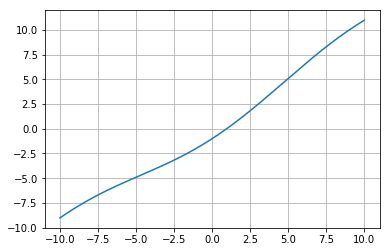

In [2]:
import math
import pylab
import numpy
import sympy as sym

def equation (x):
    return x - sym.cos (x/3)

xmin = -10.0
xmax = 10.0

dx = 0.01
xlist = numpy.arange(xmin, xmax, dx)
ylist = [equation (x) for x in xlist]
pylab.plot (xlist, ylist)
pylab.grid()
pylab.show()

По графику видно, что корень уравнения находится на отрезке [0, 2] и приближенно равен ~0.9

## 2. Метод хорд

Рассмотрим отрезок [0, 2] и найдем пересечение хорды AB с осью OX

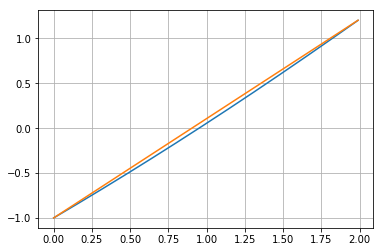

Точка пересечения хорды с OX: 0.903296369949894


In [3]:
A = 0
B = 2

def chord(p_1,p_2,x):
    return (equation(p_1) - equation(p_2)) * (x - p_2) / (p_1 - p_2) + equation(p_2)

def show_chord(point_1, point_2):
    chord_xlist = numpy.arange(point_1, point_2, dx)
    chord_ylist = [chord (point_1, point_2, x) for x in chord_xlist]
    pylab.plot (xlist, ylist)
    pylab.plot (chord_xlist, chord_ylist)
    pylab.grid()
    pylab.show()
    
dx = 0.01
xlist = numpy.arange(A, B, dx)
ylist = [equation (x) for x in xlist]
point_1 = A
point_2 = B
show_chord(point_1, point_2)
current_x = point_1 - equation(point_1)*(point_2 - point_1) / (equation(point_2) - equation(point_1))
prev_point = point_1 if equation(current_x) * equation(point_1) < 0 else point_2
prev_x = prev_point
print ("Точка пересечения хорды с OX:", current_x)

Продолжаем итерации пока |x(n) - x(n-1)| > 0.00001:

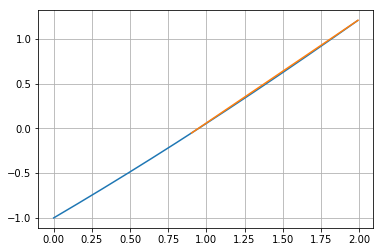

0.903296369949894


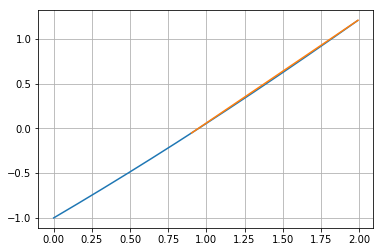

0.948101713859584


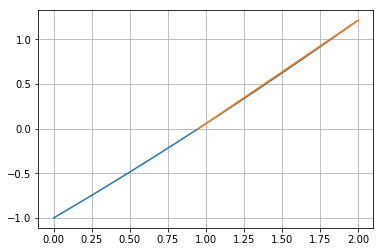

0.950154374639316


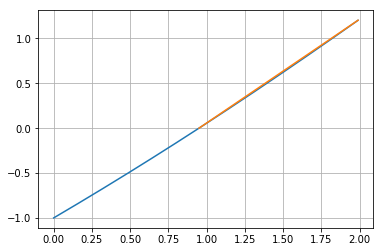

0.950248011600260


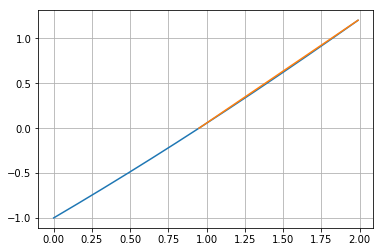

0.950252282231037
Приближенное решение уравнения: 0.950252282231037


In [4]:
epsilon = 0.00001
show_chord(current_x, prev_point)
print(current_x)
while abs(prev_x - current_x) > epsilon:
    point_1 = prev_point
    point_2 = current_x
    show_chord(point_2, point_1)
    prev_x = current_x
    current_x = point_1 - equation(point_1)*(point_2 - point_1) / (equation(point_2) - equation(point_1))
    prev_point = point_1 if equation(current_x) * equation(point_1) < 0 else point_2
    print(current_x)
    
print("Приближенное решение уравнения:", current_x) 

## 3. Метод касательных

Выберем в качестве начального приближения x0 = 2, так как f(2)*f''(2)>0.
А также точность равную 0.00001.

Найдем производную заданной функции:

In [5]:
x = sym.Symbol('x')
eq = equation(x)
deriv = sym.diff(eq, x, 1)
print(deriv)

sin(x/3)/3 + 1


In [6]:
x0 = 2
A = 0
B = 2

def tangent(x, x0):
    return equation(x0) + (sym.sin(x0/3)/3 + 1)*(x-x0)

def show_tangent(x0):
    tangent_ylist = [tangent(x, x0) for x in tangent_xlist]
    pylab.plot (xlist, ylist)
    pylab.plot (tangent_xlist, tangent_ylist)
    pylab.grid()
    pylab.show()

dx = 0.01
xlist = numpy.arange(A, B, dx)
ylist = [equation (x) for x in xlist]
tangent_xlist = numpy.arange(A, B, dx)


Совершаем итерации, пока не получим заданную точность:

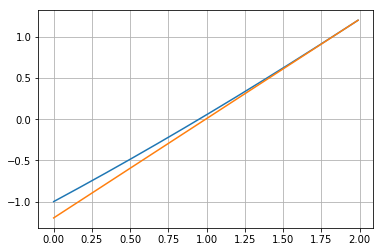

2


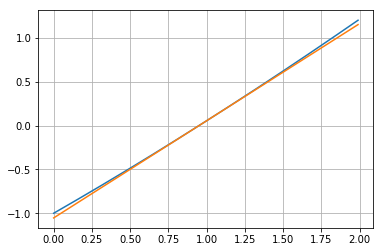

0.993375907963004


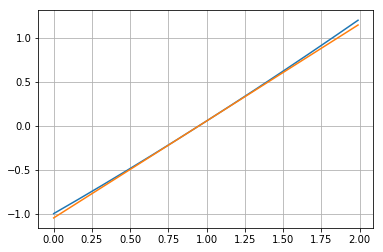

0.950340777975372


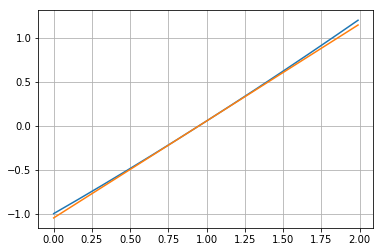

0.950252486686483


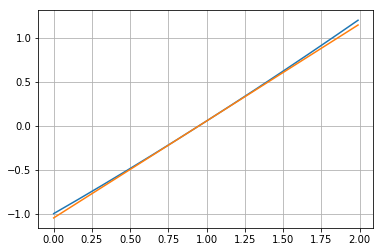

0.950252486313664
Приближенное решение уравнения:  0.950252486313664


In [7]:
prev_x = 2
show_tangent(prev_x)
print(prev_x)

current_x = prev_x - equation(prev_x)/deriv.evalf(subs = {x:prev_x})  
show_tangent(current_x)
print(current_x)

while abs(current_x - prev_x) > epsilon:
    prev_x = current_x
    current_x = prev_x - equation(prev_x)/deriv.evalf(subs = {x:prev_x})  
    show_tangent(current_x)  
    print(current_x) 
    
print ("Приближенное решение уравнения: ", current_x)  

## Система уравнений:

In [9]:
def eq_1(x, y):
    return pylab.tan(x * y + 0.4) - x**2

def eq_2(x, y):
    return 0.6 * x**2 + 2 * y**2 -1

## 4. Отделим корни системы уравнений графически:

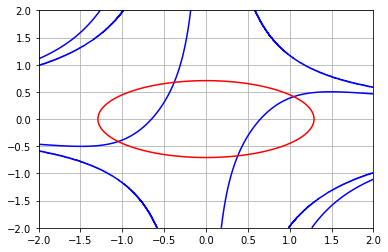

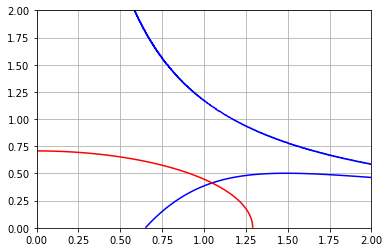

In [10]:
y,x=numpy.ogrid[-2:2:1000j,-2:2:1000j]
pylab.contour(x.ravel(),y.ravel(),eq_1(x, y),[0], colors = 'blue')
pylab.contour(x.ravel(),y.ravel(),eq_2(x, y),[0], colors = 'red')
pylab.grid()
pylab.show()

y,x=numpy.ogrid[0:2:1000j,0:2:1000j]
pylab.contour(x.ravel(),y.ravel(),eq_1(x, y),[0], colors = 'blue')
pylab.contour(x.ravel(),y.ravel(),eq_2(x, y),[0], colors = 'red')
pylab.grid()
pylab.show()

По графику видно, что решение находится на прямоугольнике x = [1, 1.25], y = [0.25, 0.5] и приближенно равно x ~ 1.1, y ~ 0.4

## 5. Метод простых итераций 

Преобразуем систему для метода простых итераций, в качестве начального приближения выберем x = 1, y = 0.25.
Точность - 0.00001

In [11]:
epsilon = 0.00001
prev_x, prev_y = 1, 0.25

def fi_1 (x, y):
    return (sym.tan(x*y + 0.4))**(1/2)
def fi_2 (x, y):
    return ((1 - 0.6*x**2)/2)**(1/2)

current_x, current_y = fi_1(prev_x, prev_y), fi_2(prev_x, prev_y)
num = 1

while (abs(current_x - prev_x) > epsilon or abs(current_y - prev_y) > epsilon):
    prev_x, prev_y = current_x, current_y
    current_x, current_y = fi_1(prev_x, prev_y), fi_2(prev_x, prev_y)
    num += 1

print ("Приближенное решение системы:", current_x, current_y)
print ("Количество итераций:", num)

Приближенное решение системы: 1.04840179362238 0.412613695786378
Количество итераций: 113


## 6. Метод Ньютона

Находим частные производные и составляем якобиан:

In [12]:
def eq_1(x, y):
    return sym.tan(x*y + 0.4) - x**2

def eq_2(x, y):
    return 0.6*x**2 + 2*y**2 -1

x, y = sym.Symbol('x'), sym.Symbol('y')
eq_1_x_deriv = sym.diff(eq_1(x,y), x, 1)
eq_1_y_deriv = sym.diff(eq_1(x,y), y, 1)
eq_2_x_deriv = sym.diff(eq_2(x,y), x, 1)
eq_2_y_deriv = sym.diff(eq_2(x,y), y, 1)

def Jakobian(X, Y):
    return numpy.array([[float(eq_1_x_deriv.evalf(subs = {x:X,y:Y})),float(eq_1_y_deriv.evalf(subs = {x:X, y:Y}))],
                        [float( eq_2_x_deriv.evalf(subs = {x:X, y:Y})),float(eq_2_y_deriv.evalf(subs = {x:X, y:Y}))]])

Надйем приближенное решение с заданной точностью:

In [13]:
epsilon = 0.00001
prev_x, prev_y = 1, 0.25
jak = numpy.linalg.inv(Jakobian(prev_x, prev_y))
current_x, current_y = prev_x - (jak[0][0]*eq_1(prev_x, prev_y) +
                                 jak[0][1]*eq_2(prev_x, prev_y)),\
                       prev_y - (jak[1][0]*eq_1(prev_x, prev_y) +
                                 jak[1][1]*eq_2(prev_x, prev_y))  
num = 1
while (abs(current_x - prev_x) > epsilon or abs(current_y - prev_y) > epsilon):
    prev_x, prev_y = current_x, current_y
    jak = numpy.linalg.inv(Jakobian(prev_x, prev_y))
    current_x, current_y = prev_x - (jak[0][0]*eq_1(prev_x, prev_y) +
                                     jak[0][1]*eq_2(prev_x, prev_y)),\
                           prev_y - (jak[1][0]*eq_1(prev_x, prev_y) +
                                     jak[1][1]*eq_2(prev_x, prev_y)) 
    num += 1
    
print ("Приближенное решение системы:", current_x, current_y)
print ("Количество итераций:", num)    

Приближенное решение системы: 1.04840014107340 0.412622276800681
Количество итераций: 4


## 7. Модифицированный метод Ньютона

Вычисляем обратную матрицу для якобиана только в начальной точке:

In [14]:
epsilon = 0.00001
prev_x, prev_y = 1, 0.25
jak = numpy.linalg.inv(Jakobian(prev_x, prev_y))
current_x, current_y = prev_x - (jak[0][0]*eq_1(prev_x, prev_y) +
                                 jak[0][1]*eq_2(prev_x, prev_y)),\
                       prev_y - (jak[1][0]*eq_1(prev_x, prev_y) +
                                 jak[1][1]*eq_2(prev_x, prev_y))  
num = 1
while (abs(current_x - prev_x) > epsilon or abs(current_y - prev_y) > epsilon):
    prev_x, prev_y = current_x, current_y
    current_x, current_y = prev_x - (jak[0][0]*eq_1(prev_x, prev_y) +
                                     jak[0][1]*eq_2(prev_x, prev_y)),\
                           prev_y - (jak[1][0]*eq_1(prev_x, prev_y) +
                                     jak[1][1]*eq_2(prev_x, prev_y)) 
    num += 1
    
print ("Приближенное решение системы:", current_x, current_y)
print ("Количество итераций:", num)    

Приближенное решение системы: 1.04840041002870 0.412624443390284
Количество итераций: 19


## 8. Сравним сходимость методов:

#### Количество итераций для заданной точности 0.00001:
Метод простых итераций - 113

Метод Ньютона - 4

Модифицированный метод Ньютона - 19